In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [2]:
end = datetime.now()
start = datetime(end.year - 6, end.month, end.day)
stock = "BTC-USD"
bit_coin_data = yf.download(stock, start, end)
Closing_price = bit_coin_data[['Close']]
bit_coin_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-30,9426.110352,9477.139648,9166.809570,9240.549805,9240.549805,8673920000
2018-05-01,9251.469727,9255.879883,8891.049805,9119.009766,9119.009766,7713019904
2018-05-02,9104.599609,9256.519531,9015.139648,9235.919922,9235.919922,7558159872
2018-05-03,9233.969727,9798.330078,9188.150391,9743.860352,9743.860352,10207299584
2018-05-04,9695.500000,9779.200195,9585.959961,9700.759766,9700.759766,8217829888


In [3]:
bit_coin_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-25,64275.019531,65275.207031,62783.632812,64481.707031,64481.707031,32155786816
2024-04-26,64485.371094,64789.656250,63322.398438,63755.320312,63755.320312,24139372950
2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039
2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,63113.230469,17334827993
2024-04-29,63103.300781,63297.140625,61826.671875,62955.656250,62955.656250,26526425088


In [4]:
bit_coin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2.192000e+03
mean,24283.828411,24830.891056,23698.615172,24306.490528,24306.490528,2.659133e+10
std,17736.009627,18177.334031,17237.155838,17749.176789,17749.176789,1.873378e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,8679.005859,8836.678955,8484.314941,8678.960938,8678.960938,1.441356e+10
50%,20218.410156,20674.214844,19819.138672,20250.554688,20250.554688,2.386838e+10
75%,37489.191406,38628.393555,36453.528320,37546.269531,37546.269531,3.504776e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [5]:
bit_coin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2018-04-30 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2192 non-null   float64
 1   High       2192 non-null   float64
 2   Low        2192 non-null   float64
 3   Close      2192 non-null   float64
 4   Adj Close  2192 non-null   float64
 5   Volume     2192 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.9 KB


In [6]:
Closing_price = bit_coin_data[['Close']]
Closing_price

,Close
Date,
2018-04-30,9240.549805
2018-05-01,9119.009766
2018-05-02,9235.919922
2018-05-03,9743.860352
2018-05-04,9700.759766
...,...
2024-04-25,64481.707031
2024-04-26,63755.320312
2024-04-27,63419.140625


In [7]:
Closing_price = bit_coin_data[['Close']]
Closing_price

,Close
Date,
2018-04-30,9240.549805
2018-05-01,9119.009766
2018-05-02,9235.919922
2018-05-03,9743.860352
2018-05-04,9700.759766
...,...
2024-04-25,64481.707031
2024-04-26,63755.320312
2024-04-27,63419.140625


Text(0.5, 1.0, 'Close price of Bit Coin')

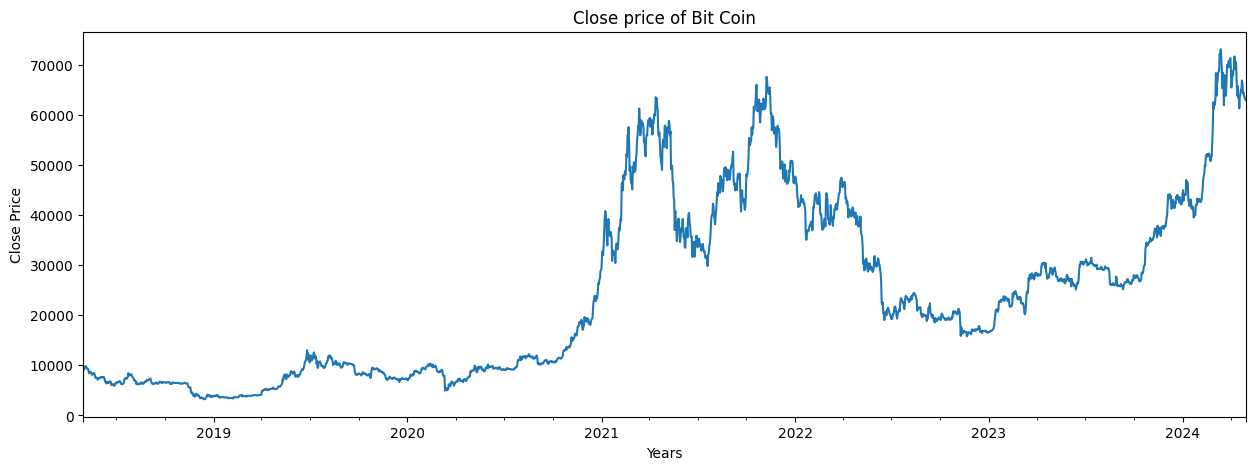

In [8]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [9]:
for i in range(2019,2024):
    print(list(Closing_price.index.year).count(i))

365
366
365
365
365


In [10]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()
Closing_price['MA_for_365_days'].head()

/var/folders/g9/1czmzwj53fq0gx2z90y7r77c0000gn/T/ipykernel_1708/686540890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


Date
2018-04-30   NaN
2018-05-01   NaN
2018-05-02   NaN
2018-05-03   NaN
2018-05-04   NaN
Name: MA_for_365_days, dtype: float64

In [11]:
Closing_price['MA_for_365_days'][0:365].tail()

Date
2019-04-25            NaN
2019-04-26            NaN
2019-04-27            NaN
2019-04-28            NaN
2019-04-29    5679.285669
Name: MA_for_365_days, dtype: float64

Text(0.5, 1.0, 'Close price of BitCoin')

<Figure size 640x480 with 0 Axes>

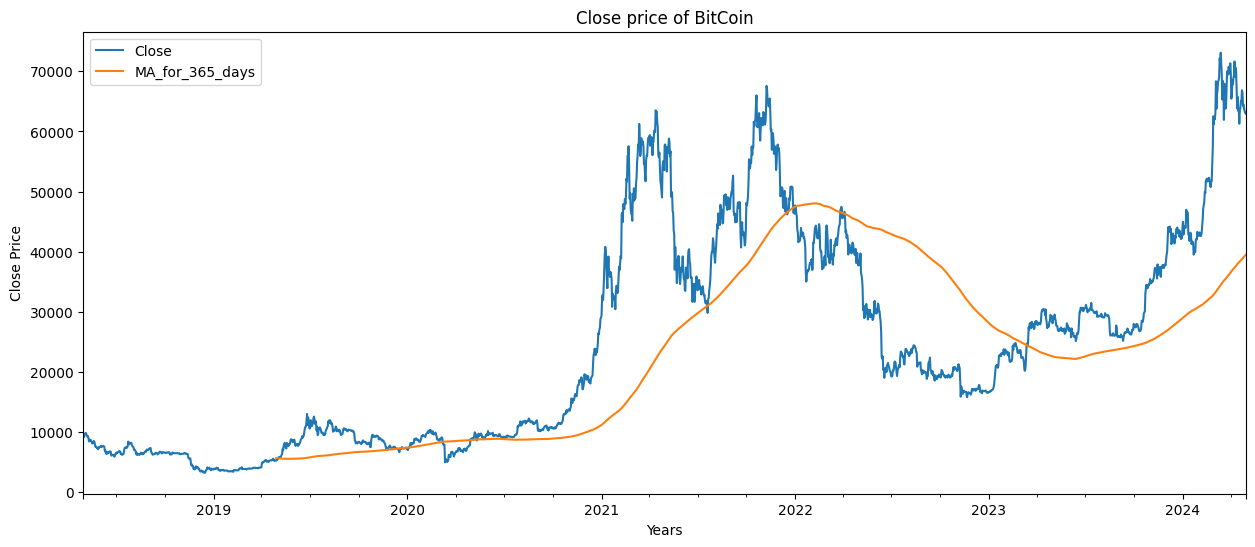

In [12]:
plt.figure()
Closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of BitCoin')

/var/folders/g9/1czmzwj53fq0gx2z90y7r77c0000gn/T/ipykernel_1708/1013624105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Bit Coin')

<Figure size 640x480 with 0 Axes>

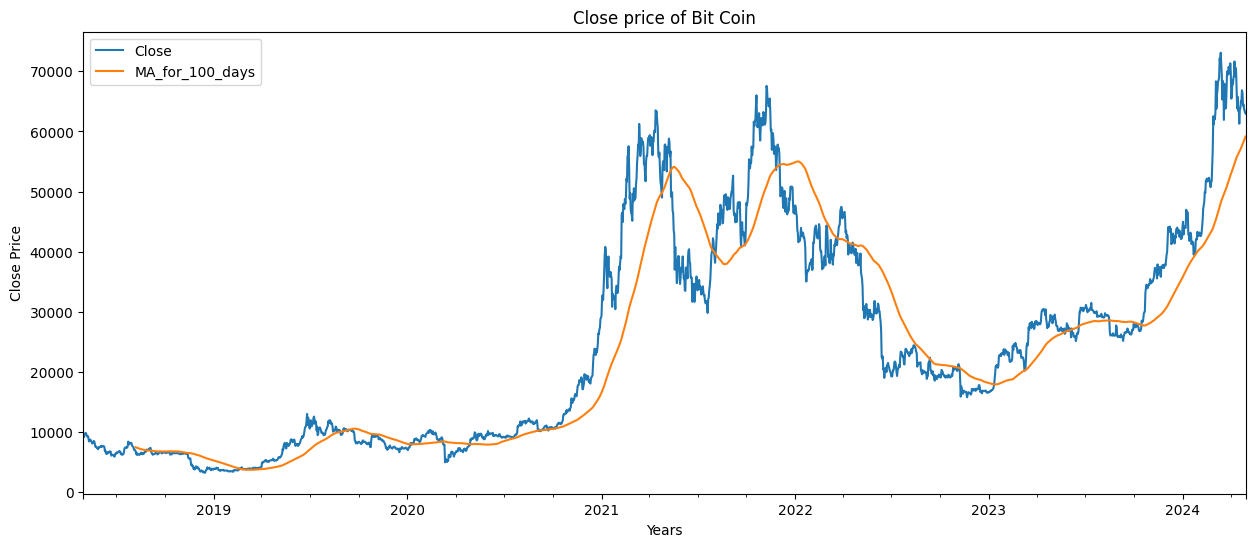

In [13]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Bit Coin')

In [14]:
# Function to predict future prices
def predict_future(model, scaler, last_100, no_of_days=10):
    future_predictions = []
    for i in range(no_of_days):
        next_day = model.predict(last_100).tolist()
        last_100[0].append(next_day[0])
        last_100 = [last_100[0][1:]]
        future_predictions.append(scaler.inverse_transform(next_day))
    return future_predictions

In [15]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)


In [16]:
# Creating sequences for LSTM
x_data = []
y_data = []
base_days = 100

for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i - base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)


In [17]:
# Splitting data into training and testing sets
len_train = int(len(x_data) * 0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]


In [18]:
# Building LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=10)


2024-04-30 20:44:29.396425: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-30 20:44:29.396466: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-30 20:44:29.396488: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-30 20:44:29.396714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-30 20:44:29.396788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-04-30 20:44:30.526636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


377/377 [==============================] - 9s 20ms/step - loss: 0.0020
Epoch 2/10
377/377 [==============================] - 7s 19ms/step - loss: 7.0916e-04
Epoch 3/10
377/377 [==============================] - 7s 19ms/step - loss: 5.1109e-04
Epoch 4/10
377/377 [==============================] - 7s 20ms/step - loss: 4.9100e-04
Epoch 5/10
377/377 [==============================] - 7s 20ms/step - loss: 4.2962e-04
Epoch 6/10
377/377 [==============================] - 7s 19ms/step - loss: 3.2263e-04
Epoch 7/10
377/377 [==============================] - 7s 20ms/step - loss: 3.5862e-04
Epoch 8/10
377/377 [==============================] - 8s 20ms/step - loss: 3.4470e-04
Epoch 9/10
377/377 [==============================] - 7s 20ms/step - loss: 3.2724e-04
Epoch 10/10
377/377 [==============================] - 7s 20ms/step - loss: 3.4469e-04


In [19]:
# Predictions on test set
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

7/7 [==============================] - 0s 16ms/step


In [20]:
# Future predictions
last_100 = Closing_price[['Close']].tail(100)
last_100_scaled = scaler.fit_transform(last_100['Close'].values.reshape(-1, 1)).reshape(1, -1, 1)
last_100_list = last_100_scaled.tolist()  # Convert to list
future_results = predict_future(model, scaler, last_100_list, no_of_days=10)

1/1 [==============================] - 0s 27ms/step


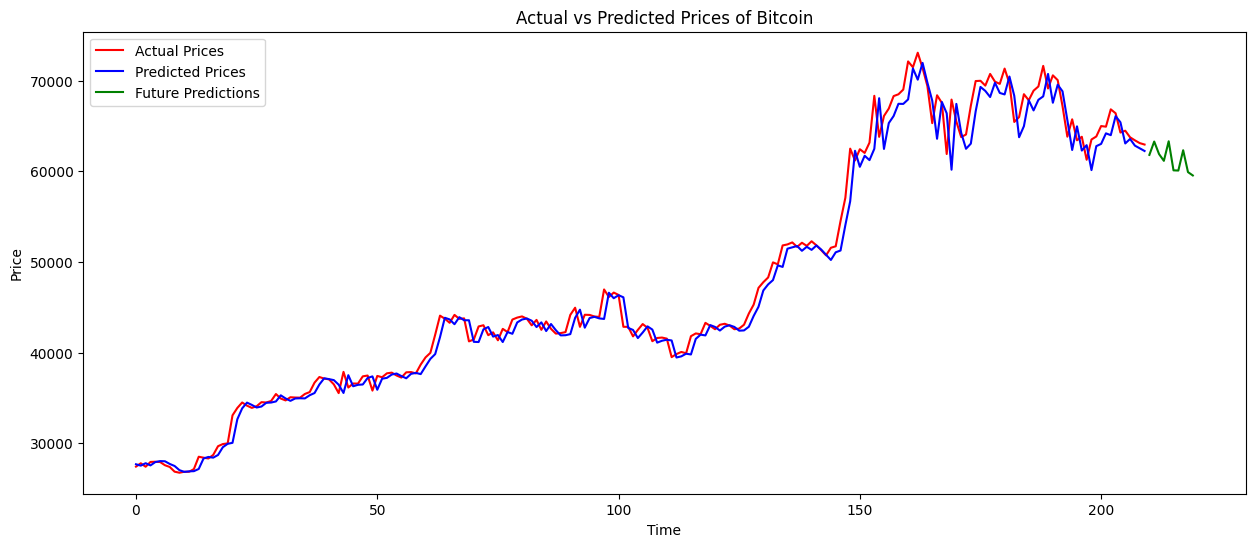

In [21]:
prediction_factor = 0.03  # You can adjust this value to control the level of randomness

# Create a list to hold the perturbed future predictions
prediction_future_results = [result * (1 + np.random.uniform(-prediction_factor, prediction_factor)) for result in future_results]

# Plotting actual vs predicted prices with extended future predictions
plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(inv_y_test)), inv_y_test, label='Actual Prices', color='red')

# Adjusting x-axis values for the predicted prices
x_pred = np.arange(len(inv_y_test))
plt.plot(x_pred, inv_predictions, label='Predicted Prices', color='blue')

x_future = np.arange(len(inv_y_test), len(inv_y_test) + len(future_results))
plt.plot(x_future, np.array(prediction_future_results).reshape(-1), label='Future Predictions', color='green')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices of Bitcoin')
plt.legend()
plt.show()

In [22]:
model.save("Latest_bit_coin_model.keras")